## Mental Fatigue Questionnaire Score

In [21]:
import numpy as np
import pandas as pd
import mental_fatigue_questionnaire_results as mf
import from_xdf_to_pandas as xdf_pandas
from statsmodels.stats.anova import AnovaRM
from scipy import stats
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

### Load data from questionnaire

In [22]:
#path = 'C:/Users/bribeiroriccioppo/Desktop/mental-fatigue/Raw Data Pilot'
#xdf_files = [xdf for xdf in listdir(path) if isfile(join(path, xdf))]
#print(xdf_files)

In [36]:
# TESTS:
# participants = ['S3','S4','S5','S6']
# S3 --> increase of MF (0 --> 2 --> 4 --> 6)
# S4 --> increase of MF
# S5 --> decrease of MF
# S6 --> non-significant increase from Q1 to Q3, then significant to Q4
participants = ['S6','S7','S8','S9','S10','S11']
nb_participants = len(participants)
q_results = []

for p in participants:
    results = (pd.read_csv(f'C:/Users/bribeiroriccioppo/Desktop/mental-fatigue/Questionnaire Data/Questionnaire_Results_{p}.csv'))
    q_results.append(results)
    print('Participant: '+str(p))
    print(results)
    print('_________________________________________________________________________________________')

Participant: S6
   Unnamed: 0  question_1  question_2  question_3  question_4  question_5  \
0           0         1.0         1.0         1.0         2.0         3.0   
1           1         2.0         2.0         3.0         3.0         3.0   
2           2         4.0         4.0         4.0         4.0         2.0   
3           3         5.0         5.0         5.0         4.0         2.0   

   question_6  question_7  question_113  question_214  question_315  \
0         5.0         5.0           5.0           4.0           1.0   
1         2.0         4.0           2.0           3.0           1.0   
2         2.0         3.0           3.0           2.0           1.0   
3         1.0         2.0           2.0           1.0           1.0   

   question_416  question_517  question_518  question_519  
0           3.0           4.0           2.0           0.0  
1           4.0           4.0           4.0           1.0  
2           5.0           4.0           4.0           2.0  
3 

In [38]:
# Correction participant S11:
q_results[5]['question_315'][0] = 0.0
q_results[5]['question_416'][0] = 0.0
q_results[5]['question_517'][0] = 1.0
q_results[5]['question_518'][0] = 0.0
q_results[5]['question_519'][0] = 0.0

print('Participant S11: ')
print(q_results[5])


Participant S11: 
   Unnamed: 0  question_1  question_2  question_3  question_4  question_5  \
0           0         1.0         0.0         0.0         0.0         5.0   
1           1         2.0         0.0         0.0         1.0         4.0   
2           2         3.0         1.0         0.0         2.0         4.0   
3           3         4.0         1.0         1.0         2.0         4.0   

   question_6  question_7  question_113  question_214  question_315  \
0         5.0         3.0           4.0           5.0           0.0   
1         4.0         4.0           5.0           5.0           0.0   
2         4.0         3.0           2.0           3.0           0.0   
3         2.0         2.0           2.0           2.0           0.0   

   question_416  question_517  question_518  question_519  
0           0.0           1.0           0.0           0.0  
1           0.0           3.0           0.0           0.0  
2           0.0           3.0           1.0           0.0  


C:\Users\BRIBEI~1\AppData\Local\Temp/ipykernel_388/3524667331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_results[5]['question_315'][0] = 0.0
C:\Users\BRIBEI~1\AppData\Local\Temp/ipykernel_388/3524667331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_results[5]['question_416'][0] = 0.0
C:\Users\BRIBEI~1\AppData\Local\Temp/ipykernel_388/3524667331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_results[5]['questio

### MF answers, Mean and Std calculations

Participant: 0
Results: [[1. 1. 1. 1. 1. 1. 2. 3. 4. 2. 0.]
 [2. 2. 3. 4. 2. 4. 3. 4. 4. 4. 1.]
 [4. 4. 4. 4. 3. 3. 4. 5. 4. 4. 2.]
 [5. 5. 5. 5. 4. 4. 5. 6. 6. 6. 2.]]
Mean: [1.54545455 3.         3.72727273 4.81818182]
Std: [1.07565087 1.04446594 0.74965557 1.11340443]
_________________________________________________________________________________________
Participant: 1
Results: [[3. 2. 1. 3. 4. 4. 4. 3. 4. 0. 1.]
 [4. 5. 3. 4. 4. 4. 5. 5. 4. 0. 2.]
 [5. 5. 4. 5. 5. 5. 5. 5. 5. 0. 3.]
 [6. 6. 4. 5. 6. 6. 6. 5. 1. 0. 3.]]
Mean: [2.63636364 3.63636364 4.27272727 4.36363636]
Std: [1.36666331 1.4316378  1.4826824  2.05703791]
_________________________________________________________________________________________
Participant: 2
Results: [[4. 3. 2. 3. 2. 2. 2. 2. 2. 1. 0.]
 [3. 3. 3. 3. 4. 4. 3. 2. 3. 2. 0.]
 [4. 4. 4. 4. 5. 3. 3. 3. 3. 3. 0.]
 [5. 5. 5. 5. 4. 5. 3. 4. 4. 5. 0.]]
Mean: [2.09090909 2.72727273 3.27272727 4.09090909]
Std: [0.9958592  1.05234881 1.21287855 1.44313708]
____

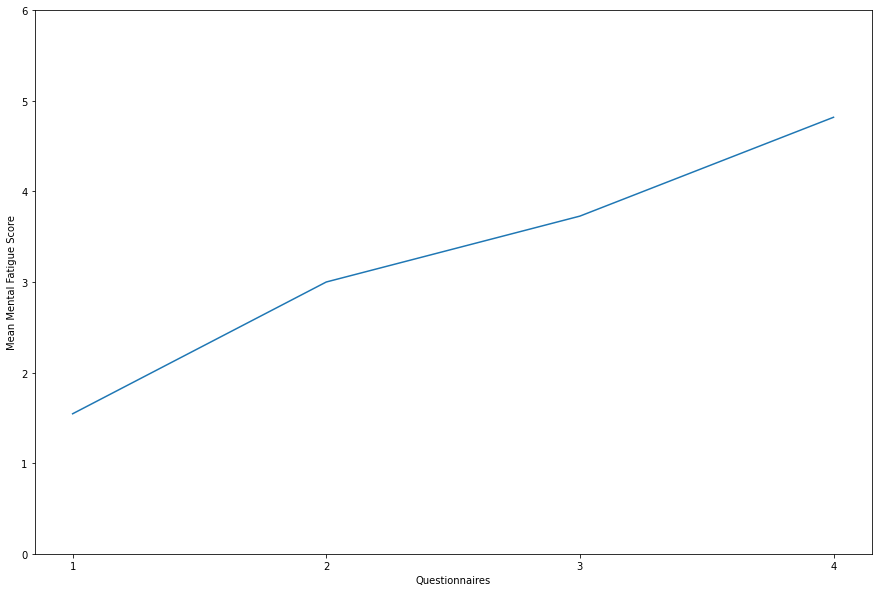

Participant: 1


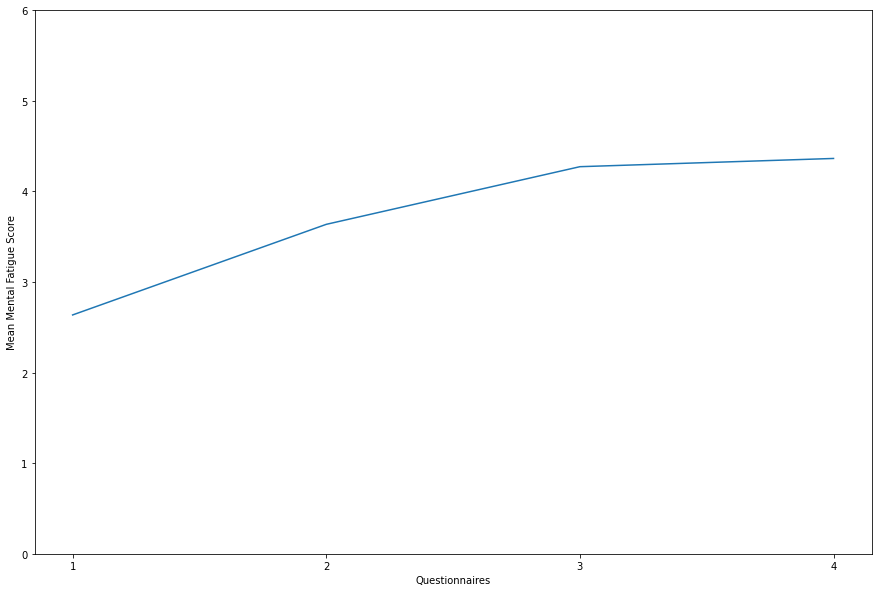

Participant: 2


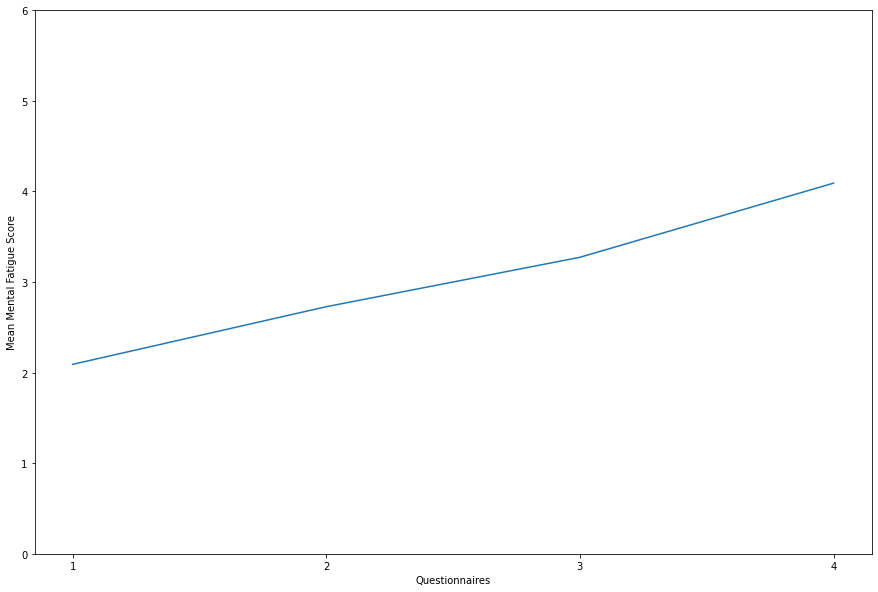

Participant: 3


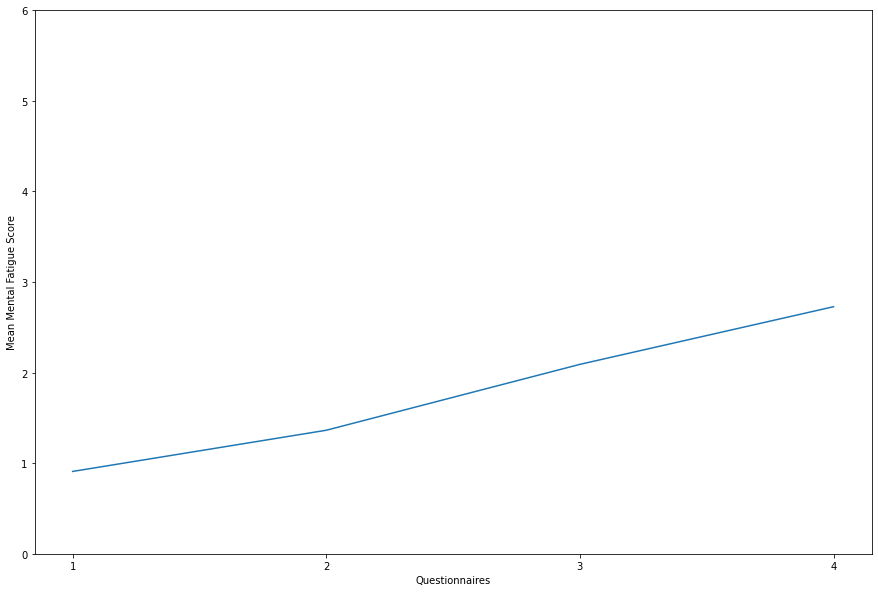

Participant: 4


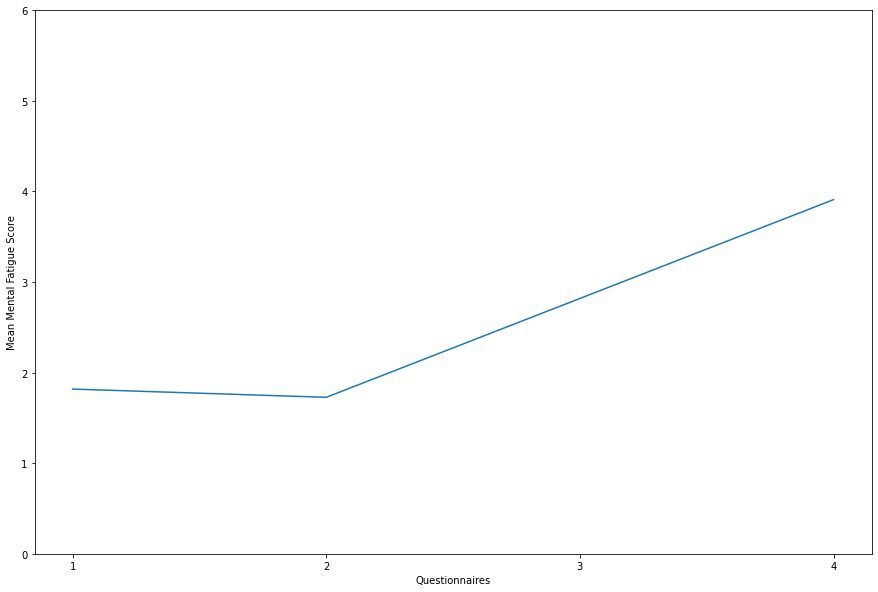

Participant: 5


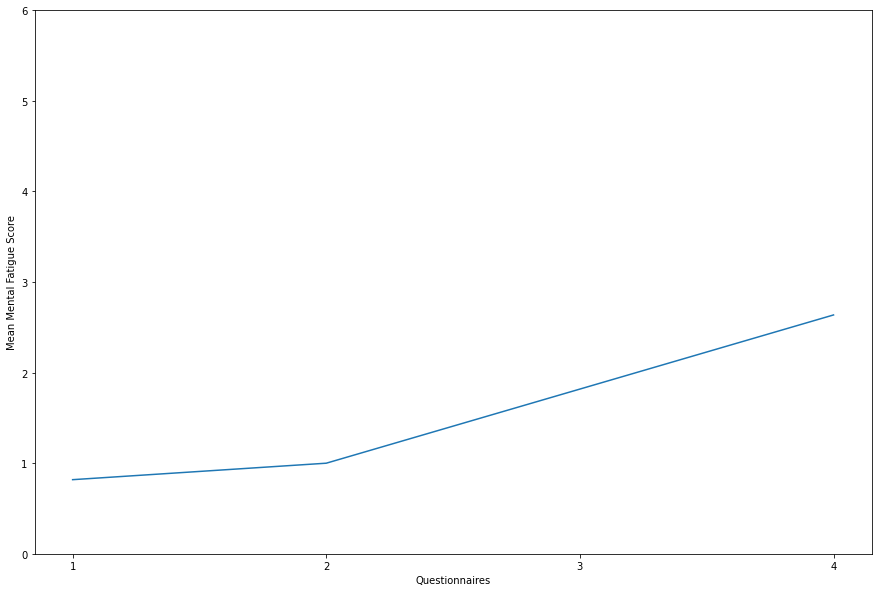

In [39]:
# MF Answers + Means + Stds calculations

mf_questions_tot = []
mf_means_tot = []
mf_stds_tot = []
for p in range(nb_participants):
    participant = q_results[p]
    mf_questions, mf_means, mf_stds = mf.load_mf_questions(participant)
    mf_questions_tot.append(mf_questions)
    mf_means_tot.append(mf_means)
    mf_stds_tot.append(mf_stds)
    print('Participant: '+str(p))
    print('Results: '+str(mf_questions))
    print('Mean: '+str(mf_means))
    print('Std: '+str(mf_stds))
    print('_________________________________________________________________________________________')

# Plotting means
for i in range(nb_participants):
    print('Participant: '+str(i))
    x = mf_means_tot[i]
    name = participants[i]
    mf.plot_means(x,name)
    
    
# Order: 
# question_1 = tired
# question_2 = fatigued
# question_3 = drowsy
# question_6 = energetic
# question_7 = active
# question_8 = efficient
# question_9 = motivated
# question_416 = eyes_open
# question_517 = concentrated
# question_518 = blurred_vision
# question_519 = headache

### Visualitation of the answers

Participant: 0


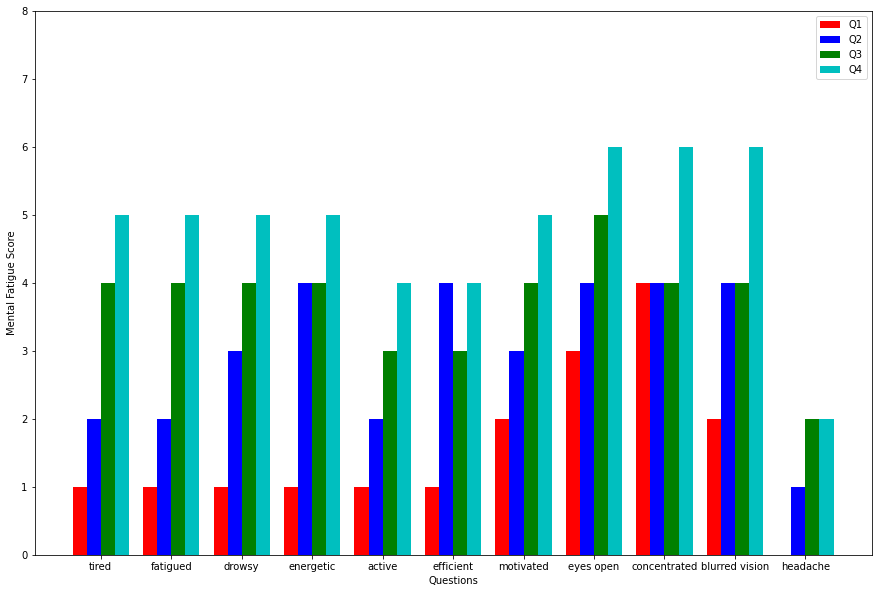

Participant: 1


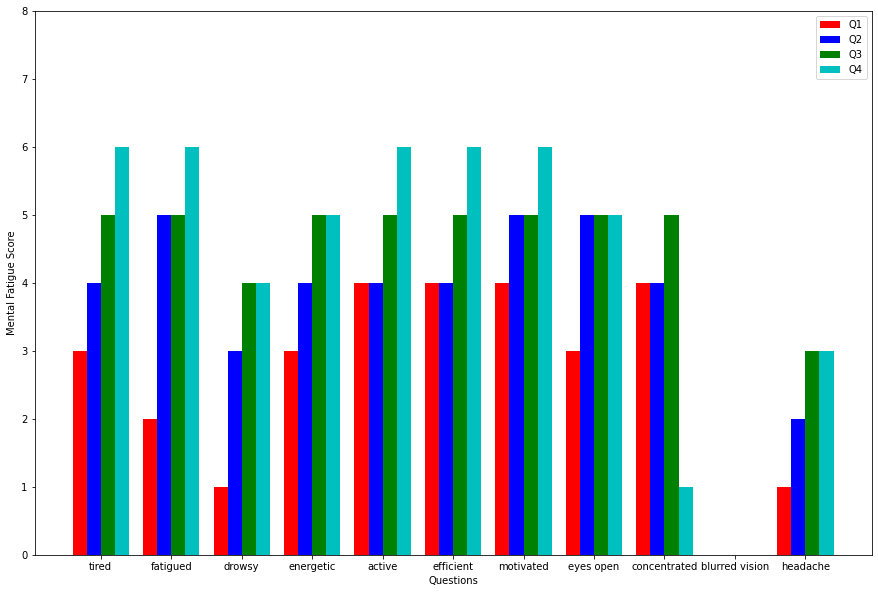

Participant: 2


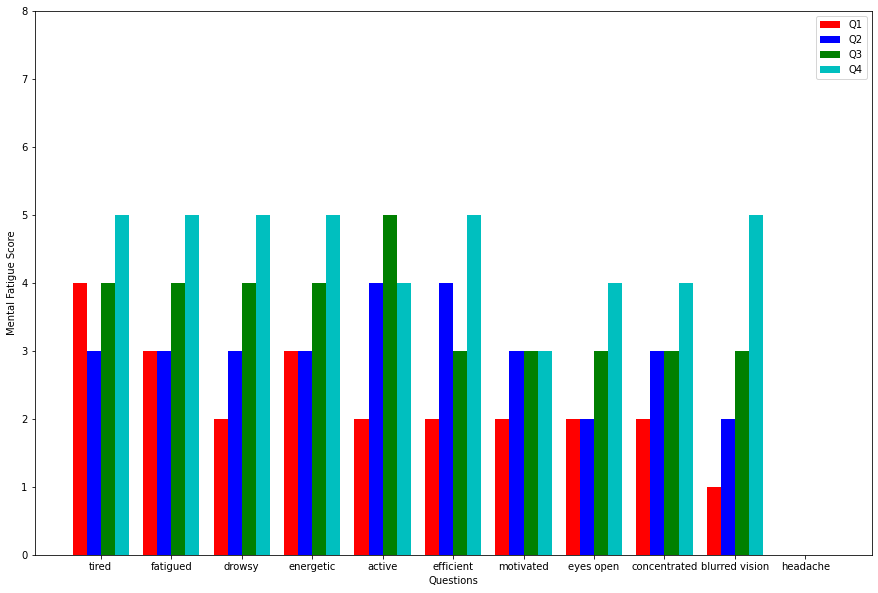

Participant: 3


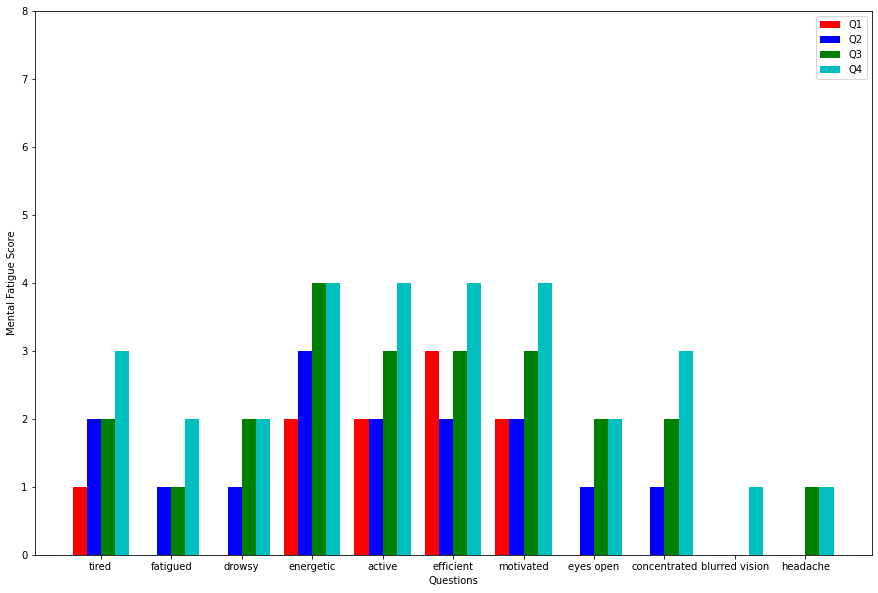

Participant: 4


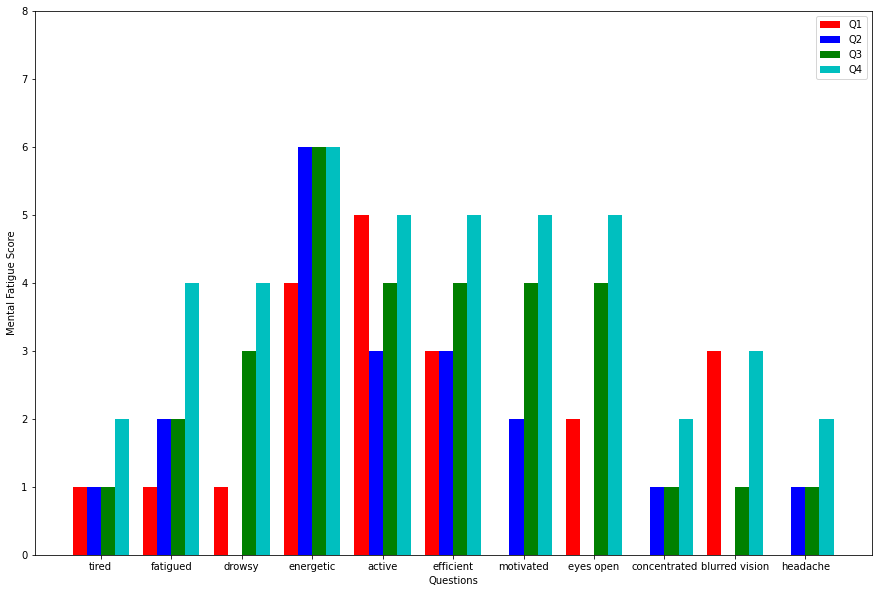

Participant: 5


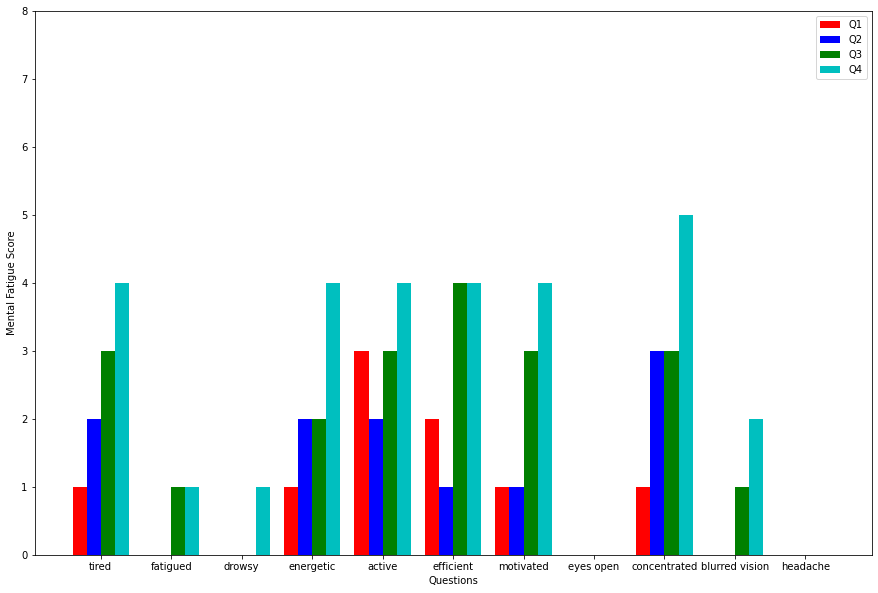

In [40]:
# Creating plots
for i in range(nb_participants):
    print('Participant: '+str(i))
    x = mf_questions_tot[i]
    name = participants[i]
    mf.plot_results(x,name)


### Box Plots

Participant: 0


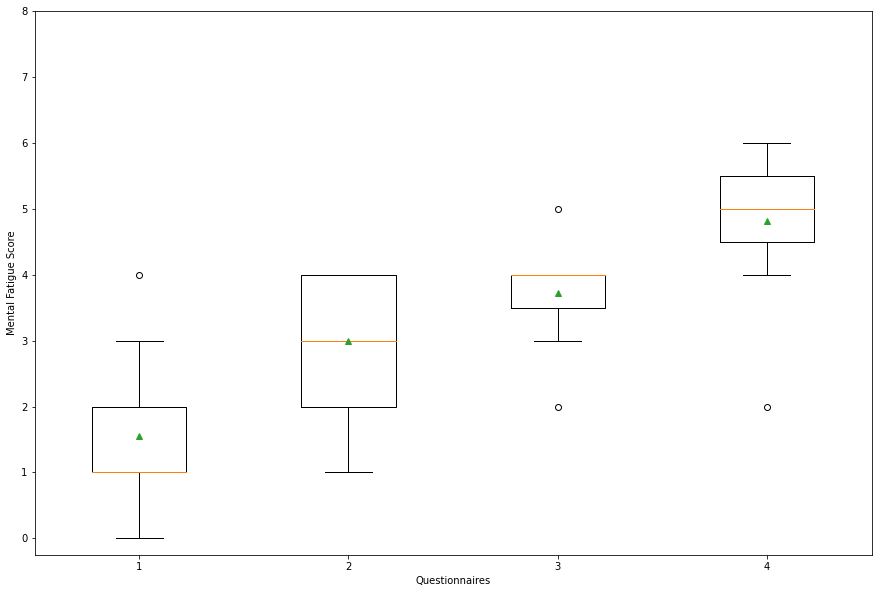

Participant: 1


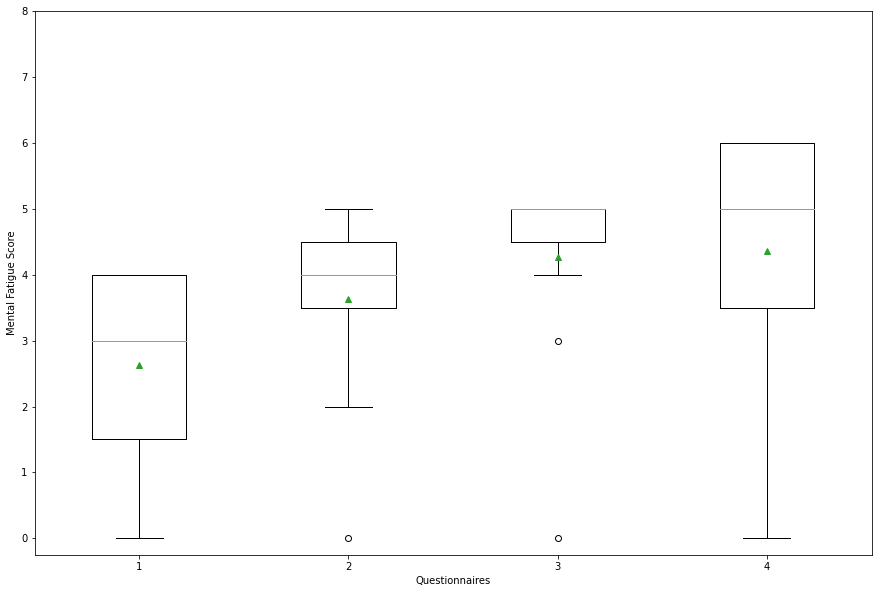

Participant: 2


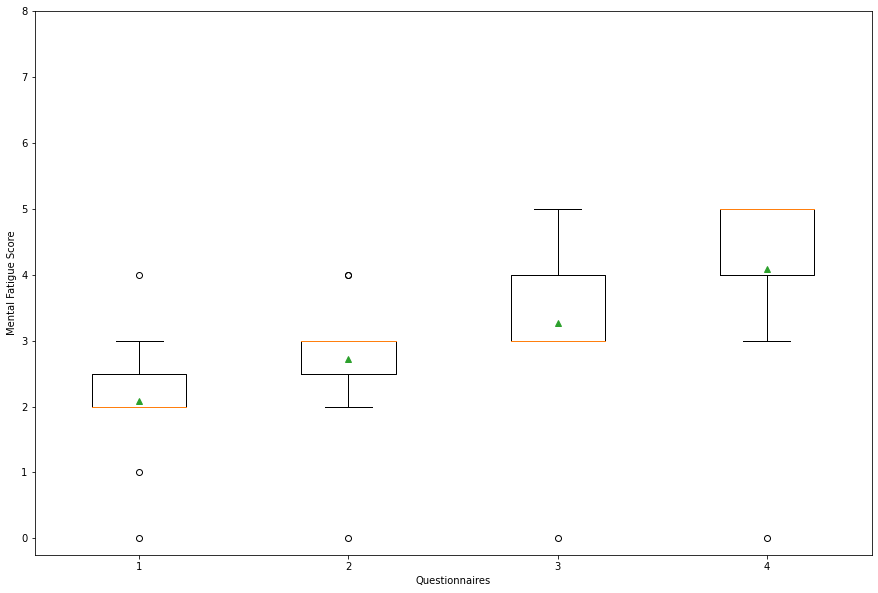

Participant: 3


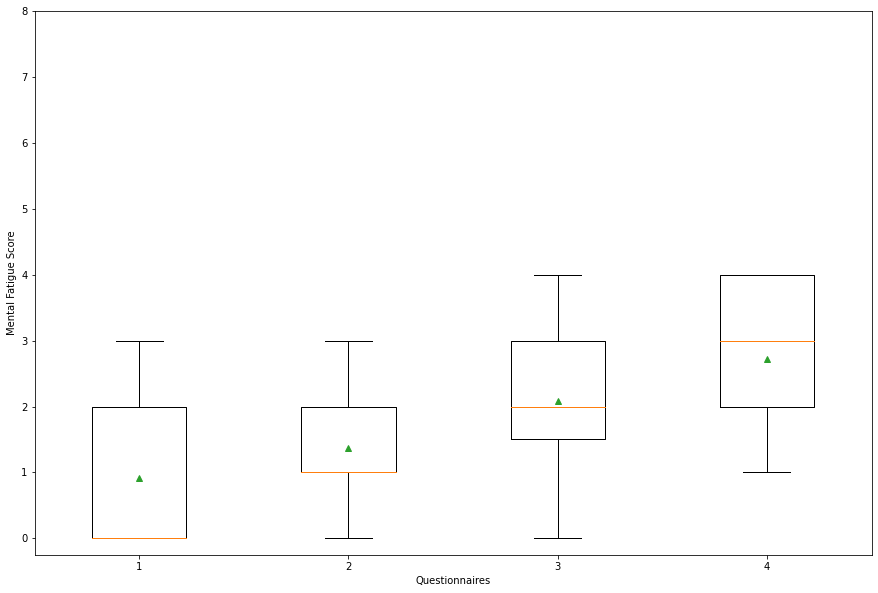

Participant: 4


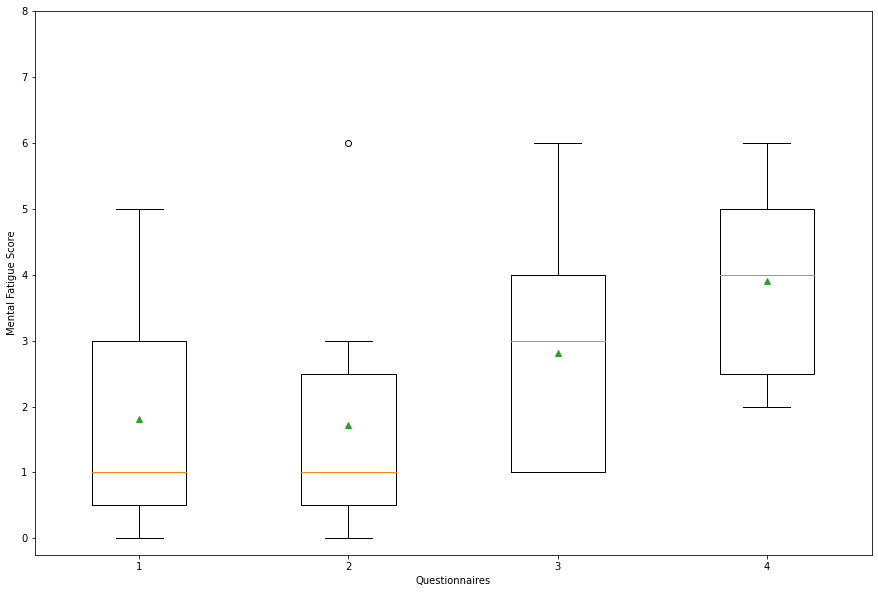

Participant: 5


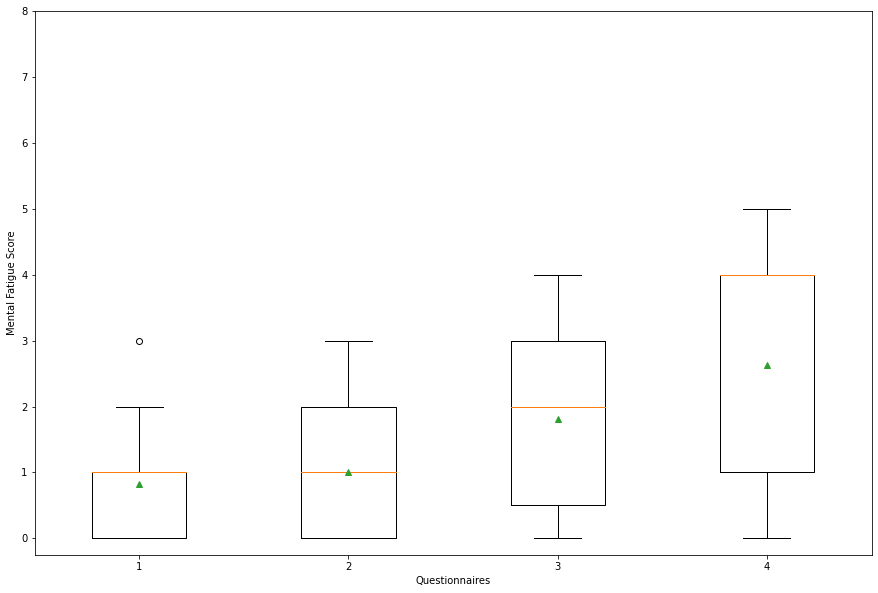

In [41]:
# Creating boxplots
for i in range(nb_participants):
    print('Participant: '+str(i))
    x = (np.transpose(mf_questions_tot[i]))
    name = participants[i]
    mf.plot_boxplots(x,name)

In [42]:
#Create data for ANOVA
# df1 = pd.DataFrame({'Id': np.repeat([1], 4),
#                           'Questionnaire': [1, 2, 3, 4],
#                            'Answer': [q1, q2, q3, q4]})

# print(df1)

# df2 = pd.DataFrame({'Id': np.repeat([1], 4),
#                           'Questionnaire': [1, 2, 3, 4],
#                            'Mean': MF_means})

# print(df2)

### ANOVA

In [43]:
# Run a one-way ANOVA and print out alpha, the p value,
# and whether the comparison says to reject the null hypothesis.
#https://nathancarter.github.io/how2data/site/how-to-do-a-one-way-analysis-of-variance-anova/
alpha = 0.05
ANOVA_results = []

for i in range(nb_participants):
        print('Participant: '+str(i))
        q1 = mf_questions_tot[i][0]
        q2 = mf_questions_tot[i][1]
        q3 = mf_questions_tot[i][2]
        q4 = mf_questions_tot[i][3]
        F_statistic, p_value = stats.f_oneway(q1, q2, q3, q4)
        reject_H0 = p_value < alpha
        ANOVA_results_single = [alpha, p_value, reject_H0]
        ANOVA_results.append(ANOVA_results_single)
        print('P-value: '+str(p_value))
        print('Reject Null: '+str(reject_H0))
        print('_________________________________________________________________________________________')

#print(ANOVA_results)

Participant: 0
P-value: 1.0267511293800874e-07
Reject Null: True
_________________________________________________________________________________________
Participant: 1
P-value: 0.07757709060502523
Reject Null: False
_________________________________________________________________________________________
Participant: 2
P-value: 0.004457001747967459
Reject Null: True
_________________________________________________________________________________________
Participant: 3
P-value: 0.0021341437493838105
Reject Null: True
_________________________________________________________________________________________
Participant: 4
P-value: 0.012732520133800421
Reject Null: True
_________________________________________________________________________________________
Participant: 5
P-value: 0.014938523263074426
Reject Null: True
_________________________________________________________________________________________


In [44]:
# t-test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
alpha = 0.05
t_tests_results = []

for i in range(nb_participants):
        print('Participant: '+str(i))
        q1 = mf_questions_tot[i][0]
        q2 = mf_questions_tot[i][1]
        q3 = mf_questions_tot[i][2]
        q4 = mf_questions_tot[i][3]
        
        # Pairwise t-test comparisons
        stat_q1q2, p_value_q1q2 = stats.ttest_rel(q1, q2, axis=0, nan_policy='propagate', alternative='less')
        reject_H0_q1q2 = p_value_q1q2 < alpha
        print('Q1-Q2:')
        print(stat_q1q2, p_value_q1q2, reject_H0_q1q2)
        print('_______________________________________')
        stat_q1q3, p_value_q1q3 = stats.ttest_rel(q1, q3, axis=0, nan_policy='propagate', alternative='less')
        reject_H0_q1q3 = p_value_q1q3 < alpha
        print('Q1-Q3:')
        print(stat_q1q3, p_value_q1q3, reject_H0_q1q3)
        print('_______________________________________')
        stat_q1q4, p_value_q1q4 = stats.ttest_rel(q1, q4, axis=0, nan_policy='propagate', alternative='less')
        reject_H0_q1q4 = p_value_q1q4 < alpha
        print('Q1-Q4:')
        print(stat_q1q4, p_value_q1q4, reject_H0_q1q4)
        print('_______________________________________')
        stat_q2q3, p_value_q2q3 = stats.ttest_rel(q2, q3, axis=0, nan_policy='propagate', alternative='less')
        reject_H0_q2q3 = p_value_q2q3 < alpha
        print('Q2-Q3:')
        print(stat_q2q3, p_value_q2q3, reject_H0_q2q3)
        print('_______________________________________')
        stat_q2q4, p_value_q2q4 = stats.ttest_rel(q2, q4, axis=0, nan_policy='propagate', alternative='less')
        reject_H0_q2q4 = p_value_q2q4 < alpha
        print('Q2-Q4:')
        print(stat_q2q4, p_value_q2q4, reject_H0_q2q4)
        print('_______________________________________')
        stat_q3q4, p_value_q3q4 = stats.ttest_rel(q3, q4, axis=0, nan_policy='propagate', alternative='less')
        reject_H0_q3q4 = p_value_q3q4 < alpha
        print('Q3-Q4:')
        print(stat_q3q4, p_value_q3q4, reject_H0_q3q4)
        print('_________________________________________________________________________________________')
        
        ttest_results_single = [stat_q1q2, p_value_q1q2, reject_H0_q1q2,
                                stat_q1q3, p_value_q1q3, reject_H0_q1q3,
                                stat_q1q4, p_value_q1q4, reject_H0_q1q4,
                                stat_q2q3, p_value_q2q3, reject_H0_q2q3,
                                stat_q2q4, p_value_q2q4, reject_H0_q2q4,
                                stat_q3q4, p_value_q3q4, reject_H0_q3q4
                               ]
        t_tests_results.append(ttest_results_single)

Participant: 0
Q1-Q2:
-5.163977794943223 0.00021139059680300927 True
_______________________________________
Q1-Q3:
-8.28078671210825 4.3466791087336985e-06 True
_______________________________________
Q1-Q4:
-13.805369799252668 3.870490437512449e-08 True
_______________________________________
Q2-Q3:
-2.666666666666667 0.011813676598822329 True
_______________________________________
Q2-Q4:
-6.900655593423542 2.0955223265171242e-05 True
_______________________________________
Q3-Q4:
-6.7082039324993685 2.6550910594813184e-05 True
_________________________________________________________________________________________
Participant: 1
Q1-Q2:
-3.3166247903554 0.0038958551059868566 True
_______________________________________
Q1-Q3:
-5.87095265748098 7.854690512867731e-05 True
_______________________________________
Q1-Q4:
-3.0985583470038502 0.005639159463455842 True
_______________________________________
Q2-Q3:
-4.183300132670378 0.0009389180674560107 True
_____________________________